for the sake of simplicity ,you will take only two features such as mean distance driven per day and mean percentage of time when driver was more then 5 mph over the speed limit here are what the data represent :id :unique id of the driver mean_dist_day :mean distance driven by driver per day  mean_over_speed_sperc :Mean percentage of time when a driver was more than 5 mph over the speed limi

In [45]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sea 
import pandas as pd 

In [46]:
import pandas as pd
data=pd.read_csv('driverdata.csv')

In [47]:
data

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [48]:
data.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


<Axes: ylabel='mean_dist_day'>

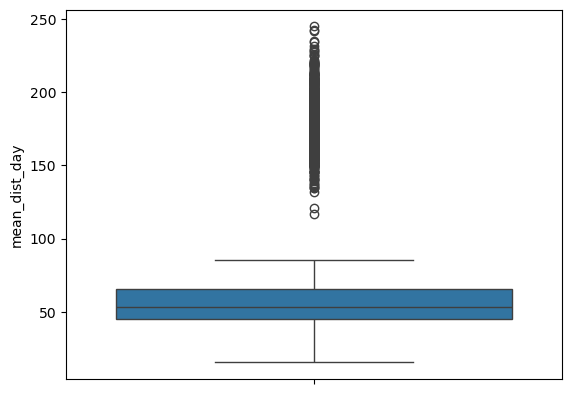

In [49]:
# outlier 
sea.boxplot(data['mean_dist_day'])

<Axes: ylabel='mean_over_speed_perc'>

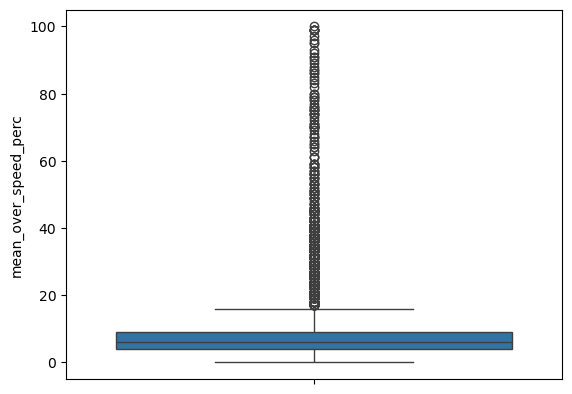

In [50]:
sea.boxplot(data['mean_over_speed_perc'])

Text(0, 0.5, 'Speed')

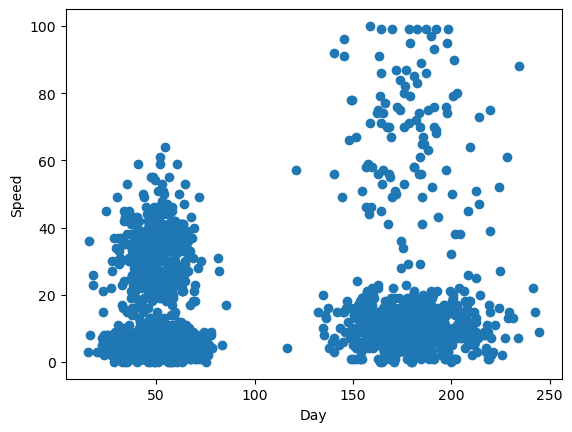

In [51]:
plt.scatter(data['mean_dist_day'],data['mean_over_speed_perc'])
plt.xlabel('Day')
plt.ylabel('Speed')

In [52]:
# Drop unnnecessary feature from data 
data.drop('id',axis=1,inplace=True)

In [53]:
data.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [54]:
# Optimal number of clusters
import warnings 
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans 
wcss =[] # it is a sum of distance btw each point and centeroid in a cluster 
# within cluster sum of square = it is a measur of compactness of clusters in K-Means 
for i in range(1,11):
    kmean = KMeans(n_clusters = i ,random_state=42)
    kmean.fit(data)
    wcss.append(kmean.inertia_)   
    print(kmean.inertia_)     # it is a measure to check how well our data is clustered by k_means 
    

12184626.12962798
1316420.8509477177
992634.0606702471
719601.5383469043
534638.1242580623
372863.5404204057
319754.80359633965
276956.7916755324
254277.27150521998
230113.21023794985


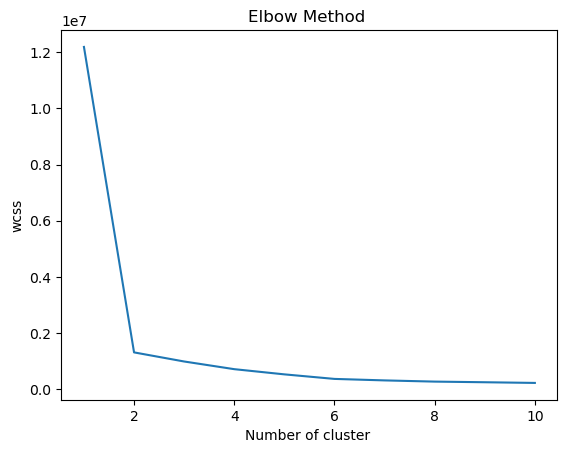

In [55]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method ')
plt.xlabel('Number of cluster ')
plt.ylabel('wcss')
plt.show()

# As per the upper graph  
the optimal number of clusters = 2

In [56]:
from sklearn.cluster import KMeans 
kmeans=KMeans(n_clusters=2)
kmeans.fit(data)

KMeans(n_clusters=2)

In [57]:
y_pred=kmeans.predict(data)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [58]:
# center of cluster 
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [59]:
# count of 0 and 1 cluster 
unique,count = np.unique(kmeans.labels_,return_counts = True)
print(list(zip(unique,count)))

[(0, 3200), (1, 800)]


In [62]:
# save the model 
import joblib 
joblib.dump(kmeans,'Kmeans.sav')
model = joblib.load('Kmeans.sav')

In [83]:
import os
print(os.getcwd())


C:\Users\DELL


In [63]:
mean_dist_day=11
mean_over_speed_perc=90
pred = model.predict([[mean_dist_day,mean_over_speed_perc]])
pred
if pred==[0]:
    print('Good profile')
else:
    print('need to check ')

Good profile


In [64]:
# create the new column of name cluster in whole data 
data['cluster']=y_pred
data

,mean_dist_day,mean_over_speed_perc,cluster
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0
...,...,...,...
3995,160.04,10,1
3996,176.17,5,1
3997,170.91,12,1
3998,176.14,5,1


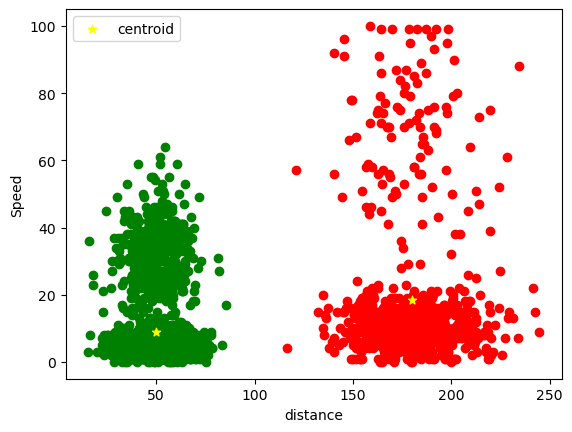

In [65]:
# To plot cluster wise data i.e k
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
plt.scatter(df1['mean_dist_day'],df1['mean_over_speed_perc'],color='green')
plt.scatter(df2['mean_dist_day'],df2['mean_over_speed_perc'],color='red')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='yellow',marker='*',label='centroid')
plt.xlabel('distance')
plt.ylabel('Speed')
plt.legend()


same dataset again 

In [66]:
df=pd.read_csv('driverdata.csv')
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


<Axes: ylabel='mean_dist_day'>

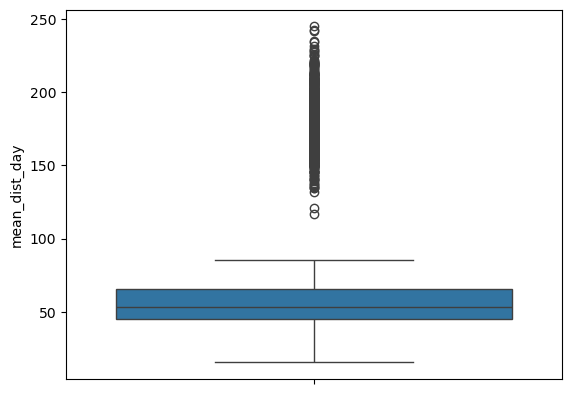

In [68]:
# check outliers 
sea.boxplot(df['mean_dist_day'])

<Axes: ylabel='mean_over_speed_perc'>

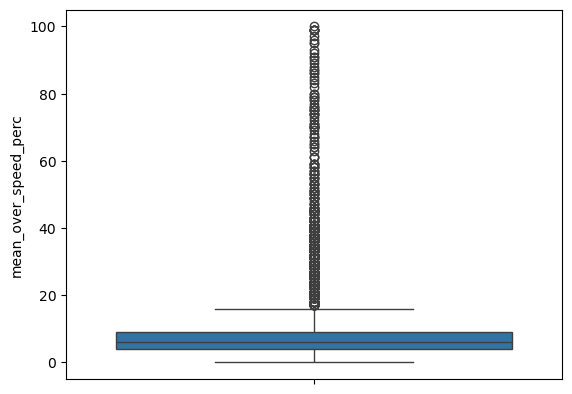

In [69]:
sea.boxplot(df['mean_over_speed_perc'])

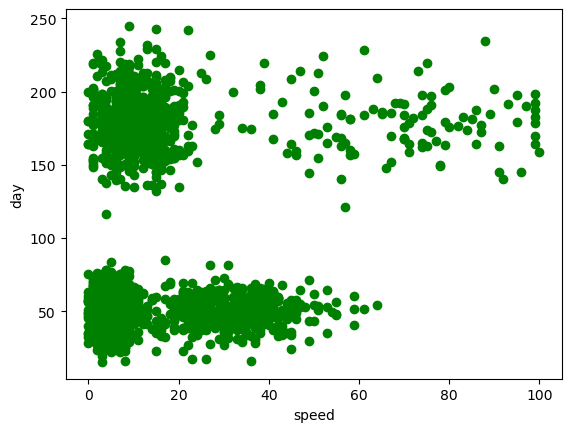

In [70]:
plt.scatter(df['mean_over_speed_perc'],df['mean_dist_day'],color="green")
plt.xlabel('speed')
plt.ylabel('day')
plt.show()

In [71]:
# drop id column as it is not needed 
df.drop('id',axis=1,inplace=True)

In [72]:
df.head(2)

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25


In [73]:
# optimal number of clusters 
import warnings 
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans 
wcss=[]
for i in range (1,11):
    km=KMeans(n_clusters=i,random_state=42)
    km.fit(df)
    wcss.append(km.inertia_)
    print(km.inertia_)
# wcss= sum of distance bet each point 
# centroid. it is the measure of compactness of cluster in kmeans  

12184626.12962798
1316420.8509477177
992634.0606702471
719601.5383469043
534638.1242580623
372863.5404204057
319754.80359633965
276956.7916755324
254277.27150521998
230113.21023794985


Text(0, 0.5, 'Compactness')

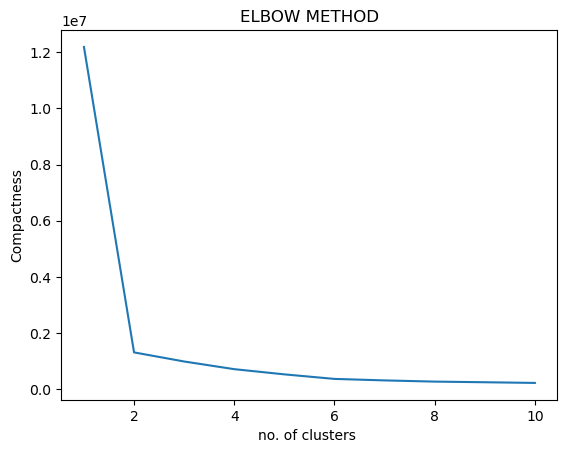

In [74]:
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('no. of clusters ')
plt.ylabel('Compactness')

In [75]:
km=KMeans(n_clusters=2)
km.fit(df)

KMeans(n_clusters=2)

In [76]:
pred=km.predict(df)
pred

array([0, 0, 0, ..., 1, 1, 1])

In [77]:
km.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [79]:
# value counts of 0 and 1 
unique,count=np.unique(km.labels_,return_counts=True)
print(dict(zip(unique,count)))

{0: 3200, 1: 800}
